# **ÖDEV-3**

1- Persona.csv verisini kullanarak EDA (Exploratory data analysis) yapın.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("persona.csv")

In [5]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [6]:
df.tail()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31
4999,29,android,female,bra,31


In [8]:
def load_persona():
    df = pd.read_csv("persona.csv")
    return df

In [9]:
df = load_persona()

In [11]:
df.shape

(5000, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [47]:
df.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

In [15]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=5000)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [17]:
df.isnull().values.any()

False

In [18]:
def check_df(dataframe, head=5):
    print("--Shape--")
    print(dataframe.shape)

    print("--Types--")
    print(dataframe.dtypes)

    print("--Head--")
    print(dataframe.head(head))

    print("--Tail--")
    print(dataframe.tail(head))

    print("--NA--")
    print(dataframe.isnull().sum())

    print("--Describe--")
    print(dataframe.describe().T)

In [20]:
check_df(df)

--Shape--
(5000, 5)
--Types--
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
--Head--
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
--Tail--
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
--NA--
PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64
--Describe--
        count     mean        std   min   25%   50%   75%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  17.0  21.0  27.0  66.0


2-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri belirleyin.

In [21]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

In [22]:
df["AGE"].value_counts()

15    569
16    494
17    450
18    348
19    309
20    264
21    257
22    242
26    216
23    210
25    180
24    173
31    120
27    113
28    109
33     95
35     87
37     70
32     68
42     66
29     63
34     61
30     57
38     42
43     36
50     33
44     29
41     28
36     25
45     24
51     23
40     21
47     20
49     19
46     12
57      8
65      8
59      8
56      7
66      7
52      7
53      6
39      5
54      4
55      4
61      3
Name: AGE, dtype: int64

In [23]:
noncountable_columns = []
for col in df.columns:
    if df[col].dtypes == "O":
        print(col, "yes") 
        noncountable_columns.append(col)

SOURCE yes
SEX yes
COUNTRY yes


In [24]:
df.drop(noncountable_columns, axis=1).head()

,PRICE,AGE
0,39,17
1,39,17
2,49,17
3,29,17
4,49,17


In [34]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['SOURCE', 'SEX', 'COUNTRY']

In [35]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
num_but_cat

['PRICE']

In [36]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_but_car

[]

In [37]:
cat_cols = cat_cols + num_but_cat

In [38]:
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [48]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in cat_cols]
num_cols

['AGE']

3-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri analiz edin. Yorumda bulunun.

In [49]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52
##########################################


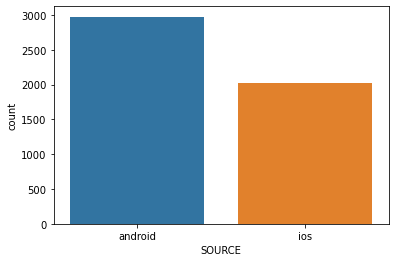

         SEX  Ratio
female  2621  52.42
male    2379  47.58
##########################################


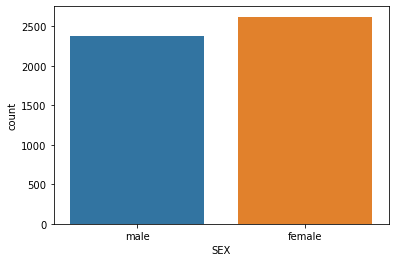

     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60
##########################################


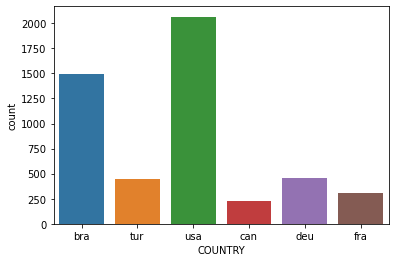

    PRICE  Ratio
29   1305  26.10
39   1260  25.20
49   1031  20.62
19    992  19.84
59    212   4.24
9     200   4.00
##########################################


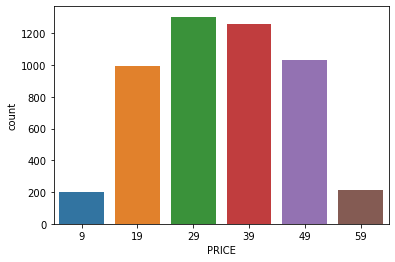

In [50]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Kategorik değişkenlerin üçü object ve cardinal değiller, fiyat değişkeni de sayısal olmasına katerogik büyük ihtimalle belirli ürün fiyatlarını göstermekte


In [51]:
def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
5%         15.000000
10%        15.000000
20%        16.000000
30%        17.000000
40%        19.000000
50%        21.000000
60%        23.000000
70%        26.000000
80%        30.000000
90%        36.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64


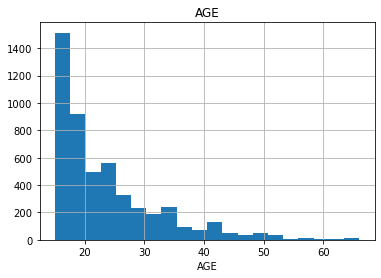

In [52]:
for col in num_cols:
    num_summary(df, col, plot=True)

### Sayısal değişkenlerden olan yaş normal dağılıma sahip değil ve ortalamadan çok uzak değerlere sahip yaşlar da bulunmakta. Bu durumda ya anket için sample iyi seçilemedi ya da bir anket değil ve ürün satış datasını göstermekte bu durumda ürününün büyük çoğunluğunu gençlerin aldığını düşünebiliriz. Ek olarak ileriki safhalarda da aykırı gözlemleri ayırmak gerekebilir.